In [2]:
from PIL import Image
import numpy as np
import gdown
import matplotlib.pyplot as plt
import os

In [16]:
ROOT = 'data'
CLASS_NAME = sorted(list(os.listdir(f'{ROOT}/train')))
SIZE = (448, 448)
CLASS_NAME[:4]

['African_crocodile', 'American_egret', 'Doberman', 'Lakeland_terrier']

In [69]:
def read_img(path, size):
    im = Image.open(path).convert('RGB').resize(size)
    return np.array(im)

def folder_to_images(folder, size):
    list_dir = [folder + '/' + name for name in os.listdir(folder)]
    images_np = np.zeros(shape=(len(list_dir), *size, 3))
    images_path = []
    for i, path in enumerate(list_dir):
        images_np[i] = read_img(path, size)
        images_path.append(path)
    images_path = np.array(images_path)
    return images_np, images_path

def plot_results(query_path, ls_path_score, reverse):
    fig = plt.figure(figsize=(15,9))
    fig.add_subplot(2, 3, 1)
    plt.imshow(read_img(query_path, size=SIZE))
    plt.title(f'Query Image: {query_path.split("/")[2]}', fontsize=16)
    plt.axis('off')
    for i, path in enumerate(sorted(ls_path_score, key=lambda x: x[1], reverse=reverse)[:5], 2):
        fig.add_subplot(2, 3, i)
        plt.imshow(read_img(path[0], size=SIZE))
        plt.title(f'Top {i-1}: {path[0].split("/")[2]}, {"{:.2f}".format(ls_path_score[i][1])}', fontsize=16)
        plt.axis('off')

    plt.show()

# L1 score

$$
L1(\vec{a}, \vec{b})=\sum_{i=1}^{N}|a-b|
$$

In [42]:
# Calculating similarity images;
def absolute_difference(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    return np.sum(np.abs(data - query), axis=axis_batch_size)

# Calculating similary between original image and data image
def get_l1_score(root_img, query_path, size):
    query = read_img(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img):
        if folder in CLASS_NAME:
            path = root_img + folder
            images_np, images_path = folder_to_images(path, size)
            rates = absolute_difference(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))

    return query, ls_path_score

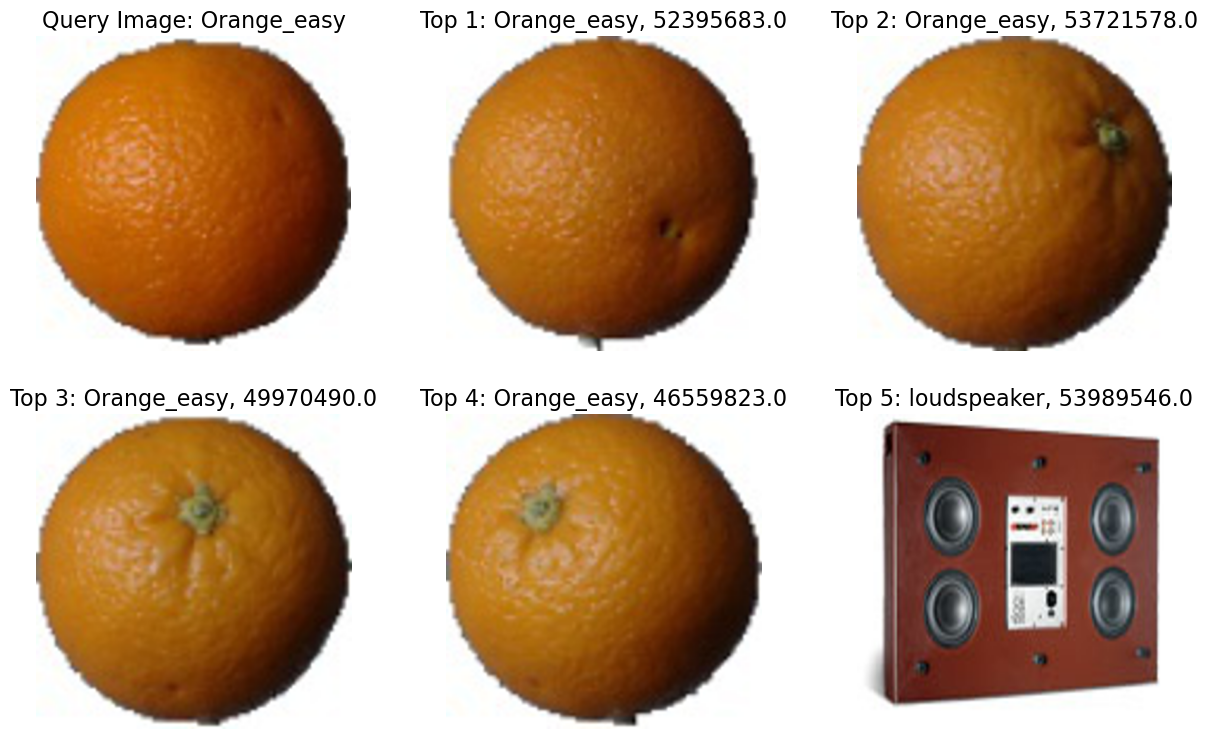

In [58]:
root_image = f'{ROOT}/train/'
query_path = f'{ROOT}/test/Orange_easy/0_100.jpg'
query, ls_path_score = get_l1_score(root_image, query_path, SIZE)
plot_results(query_path, ls_path_score, reverse=False)

# L2 score

$$L2(\vec{a}, \vec{b}) = \sqrt{\sum_{i=1}^{N} (a_i - b_i)^2}$$

In [59]:
def mean_square_difference(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    return np.mean((data - query)**2, axis = axis_batch_size)

def get_l2_score(root_img, query_path, size):
    query = read_img(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img):
        if folder in CLASS_NAME:
            path = root_img + folder
            images_np, images_path = folder_to_images(path, size)
            rates = mean_square_difference(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))

    return query, ls_path_score

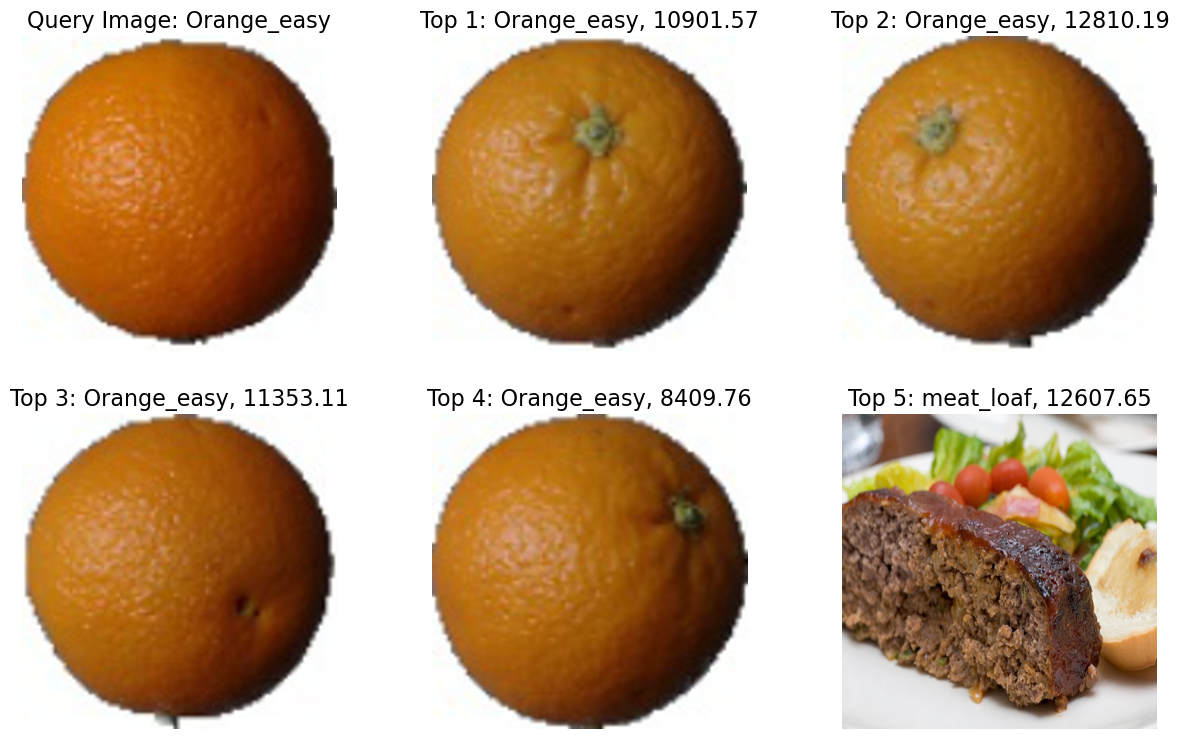

In [70]:
root_image = f'{ROOT}/train/'
query_path = f'{ROOT}/test/Orange_easy/0_100.jpg'
query, ls_path_score = get_l2_score(root_image, query_path, SIZE)
plot_results(query_path, ls_path_score, reverse=False)

# Cosine Similarity

$$
consine\_similarity(\vec{a}, \vec{b})= \frac{a \cdot b}{||a|| \ ||b||} = \frac{\sum_{i=1}^{N} a_i b_i}{\sqrt{\sum_{i=1}^{N} a_i^{2}} \sqrt{\sum_{i=1}^{N} b_i^{2}} }
$$

In [76]:
def cosine_similarity(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    query_norm = np.sqrt(np.sum(query**2))
    data_norm = np.sqrt(np.sum(data**2, axis=axis_batch_size))
    return np.sum(data * query, axis=axis_batch_size) / (query_norm * data_norm + np.finfo(float).eps)

def get_cosine_similarity_score(root_img, query_path, size):
    query = read_img(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img):
        if folder in CLASS_NAME:
            path = root_img+folder
            images_np, images_path = folder_to_images(path, size)
            rates = cosine_similarity(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))

    return query, ls_path_score

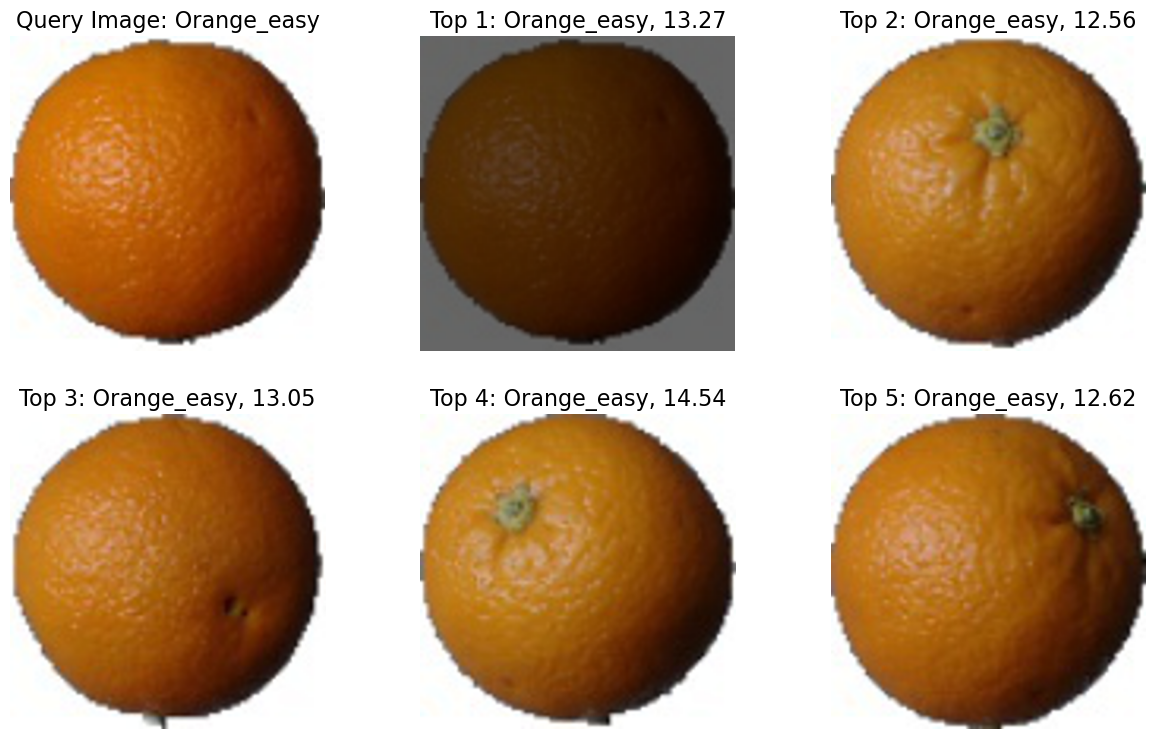

In [77]:
root_image = f'{ROOT}/train/'
query_path = f'{ROOT}/test/Orange_easy/0_100.jpg'
query, ls_path_score = get_cosine_similarity_score(root_image, query_path, SIZE)
plot_results(query_path, ls_path_score, reverse=True) # reverse = True becase the larger the cosine similarity value, the more similar they are